In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Carga de datos
# Asegúrate de que el nombre del archivo sea exacto al que tienes en JupyterLab
df = pd.read_csv('SP1.csv') 

# Transformamos H, D, A en nombres descriptivos
mapeo_resultados = {
    'H': 'Victoria Local',
    'D': 'Empate',
    'A': 'Victoria Visitante'
}
df['FTR'] = df['FTR'].map(mapeo_resultados)

# 2. Limpieza de datos (según pide la actividad)
# Eliminamos filas con valores nulos en las columnas que vamos a usar
columnas_clave = ['FTR', 'HST', 'AST', 'HC', 'AC']
df = df.dropna(subset=columnas_clave)

# 3. Preparación de variables
X = df[['HST', 'AST', 'HC', 'AC']] # Variables independientes (Features)
y = df['FTR']                      # Variable objetivo (Label)

# 4. División y Normalización
# Dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos para que todas las variables tengan la misma escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Creación y Entrenamiento del Modelo
# Usamos Regresión Logística como indica el ejercicio
modelo_futbol = LogisticRegression() 
modelo_futbol.fit(X_train_scaled, y_train)

# 6. Evaluación del Modelo
predicciones = modelo_futbol.predict(X_test_scaled)

# Definimos el orden lógico: Local -> Empate -> Visitante
orden_logico = ['Victoria Local', 'Empate', 'Victoria Visitante']

# Generamos el informe siguiendo ese orden específico
print("--- Informe de Clasificación ---")
print(classification_report(y_test, predicciones, labels=orden_logico))
print(f"Precisión total (Accuracy): {accuracy_score(y_test, predicciones):.2f}")

# 7. Validación Cruzada (para asegurar la robustez)
scores = cross_val_score(modelo_futbol, scaler.fit_transform(X), y, cv=5)
print(f"\nPrecisión media en Validación Cruzada: {scores.mean():.2f}")

--- Informe de Clasificación ---
                    precision    recall  f1-score   support

    Victoria Local       0.48      0.68      0.56        31
            Empate       0.45      0.24      0.31        21
Victoria Visitante       0.67      0.58      0.62        24

          accuracy                           0.53        76
         macro avg       0.53      0.50      0.50        76
      weighted avg       0.53      0.53      0.51        76

Precisión total (Accuracy): 0.53

Precisión media en Validación Cruzada: 0.55


In [8]:
# Extraemos los coeficientes del modelo
import matplotlib.pyplot as plt

# Usamos X.columns para obtener los nombres de las variables directamente de tus datos
coeficientes = pd.DataFrame(
    modelo_futbol.coef_, 
    columns=X.columns, 
    index=modelo_futbol.classes_
)

# Reordenamos las filas para que Empate esté en el centro
orden_filas = ['Victoria Local', 'Empate', 'Victoria Visitante']
coeficientes_ordenados = coeficientes.reindex(orden_filas)

print("--- Importancia de las Variables ---")
print(coeficientes_ordenados)

--- Importancia de las Variables ---
                         HST       AST        HC        AC
Victoria Local      0.673548 -0.414588 -0.466247 -0.056146
Empate             -0.125035 -0.164460 -0.009196  0.238957
Victoria Visitante -0.548514  0.579048  0.475444 -0.182811


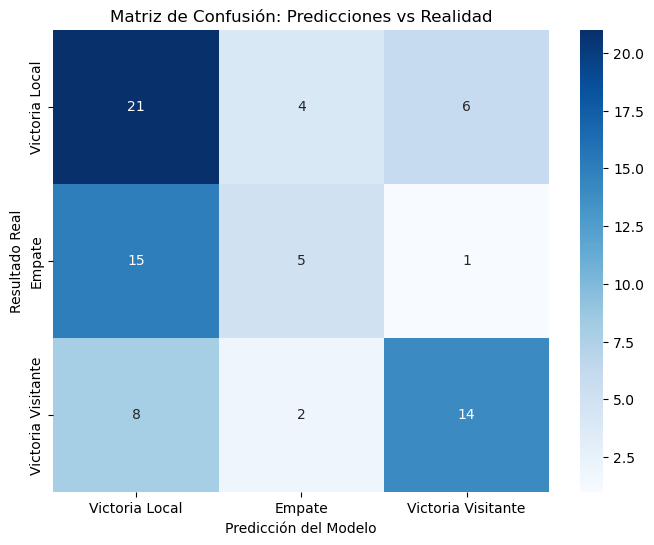

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Creamos la matriz de confusión
# Usamos el 'orden_logico' para que coincida con nuestro informe previo
cm = confusion_matrix(y_test, predicciones, labels=orden_logico)

# 2. Configuramos el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=orden_logico, 
            yticklabels=orden_logico)

plt.title('Matriz de Confusión: Predicciones vs Realidad')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Resultado Real')
plt.show()